In [87]:
from sklearn.linear_model import LinearRegression
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
scenario = "testing"

In [88]:
path_to_results = os.path.join(os.path.dirname(os.path.dirname(os.getcwd()) ), "amiris_workflow" )
path_to_structure = os.path.join(path_to_results, "amiris_data_structure.xlsx")
path_to_h2 = os.path.join(path_to_results, "amiris-config", "data","LS_hydrogen.csv")
path_to_output = os.path.join(path_to_results, "output","amiris_results.csv" )
path_to_storage_levels = os.path.join(path_to_results, "output","final_storage_levels.csv" )
path_to_generation = os.path.join(path_to_results, "output","hourly_generation_per_group.csv" )
path_to_electricity_prices = os.path.join(path_to_results, "output","raw","EnergyExchangeMulti.csv" )
path_to_plots = os.path.join(os.getcwd(),  "Scenarios", "AMIRIS_Results", scenario )
if not os.path.exists(path_to_plots):
    os.makedirs(path_to_plots)
#-----------------------------------------------------------------------------
elec_prices_data = pd.read_csv(path_to_electricity_prices, sep=";")  
generation_data =  pd.read_csv(path_to_generation, index_col="Unnamed: 0")
h2_high_data = pd.read_csv(path_to_h2, sep=";", header=None) 

results_data = pd.read_csv(path_to_output) 
storage_levels_data = pd.read_csv(path_to_storage_levels) 
storages_data = pd.read_excel(path_to_structure, sheet_name='storages', index_col=0)
conventionals_data = pd.read_excel(path_to_structure, sheet_name='conventionals', index_col=0)
renewables_data = pd.read_excel(path_to_structure, sheet_name='renewables', index_col=0)
electrolysers_data = pd.read_excel(path_to_structure, sheet_name='electrolysers', index_col=0)
biogas_data = pd.read_excel(path_to_structure, sheet_name='biogas', index_col=0)
load_shedders_data = pd.read_excel(path_to_structure, sheet_name='load_shedding')


In [142]:
loads = pd.DataFrame()
for rownum,(indx,i)  in enumerate(load_shedders_data["TimeSeries"].iteritems()): 
    print(i)
    if i != "amiris-config/data/LS_hydrogen.csv":
        path_to_load = os.path.join(path_to_results, i)
        load = pd.read_csv(path_to_load, sep=";", header=None)
        loads[rownum] = load[1]
load_data = loads.sum(axis=1) 
load_generation = pd.concat([generation_data, elec_prices_data,
                      load_data],   axis=1)

amiris-config/data/load.csv
amiris-config/data/LS_high.csv
amiris-config/data/LS_hydrogen_high.csv
amiris-config/data/LS_low.csv
amiris-config/data/LS_mid.csv


In [110]:
load_generation['group'] = (elec_prices_data.index // 7)
grouped = load_generation.groupby(['group']).sum()


In [107]:
grouped.head()

,res,conventionals,storages_discharging,storages_charging,storages_aggregated_level,load_shedding,electrolysis_power_consumption,electrolysis_hydrogen_generation,unit_3300000,unit_25000000,unit_50000000,unit_150000000,unit_400000000,AgentId,TimeStep,TotalAwardedPowerInMW,ElectricityPriceInEURperMWH,DispatchSystemCostInEUR,0
group,,,,,,,,,,,,,,,,,,,
0,4.900205e+06,1.023783e+06,0,0,0,6.204605e+06,1.334489e+06,1.334489e+06,6.204605e+06,0.000000,0.0,0.0,0.0,168,158991941304,5.923988e+06,8397.654665,2.842570e+07,1.079410e+07
1,6.374796e+06,1.041587e+06,0,0,0,4.968319e+06,1.793363e+06,1.793363e+06,4.966633e+06,1686.399143,0.0,0.0,0.0,168,159093547704,7.416382e+06,6927.373540,3.402008e+07,1.059134e+07
2,6.015438e+06,1.133493e+06,0,0,0,4.752414e+06,1.162371e+06,1.162371e+06,4.752414e+06,0.000000,0.0,0.0,0.0,168,159195154104,7.148931e+06,7556.321011,4.286779e+07,1.073897e+07
3,4.703566e+06,1.087784e+06,0,0,0,5.532808e+06,4.199127e+05,4.199127e+05,5.532199e+06,608.418482,0.0,0.0,0.0,168,159296760504,5.791350e+06,7931.308850,3.442091e+07,1.090425e+07
4,7.905086e+06,9.372709e+05,0,0,0,3.076219e+06,1.424787e+06,1.424787e+06,3.076219e+06,0.000000,0.0,0.0,0.0,168,159398366904,8.842357e+06,5460.329825,2.672568e+07,1.049379e+07


In [123]:
load_generation['group'] = (load_generation.index // (7*24))
grouped = load_generation.groupby(['group']).sum()
grouped_filtered = grouped.iloc[45:50]


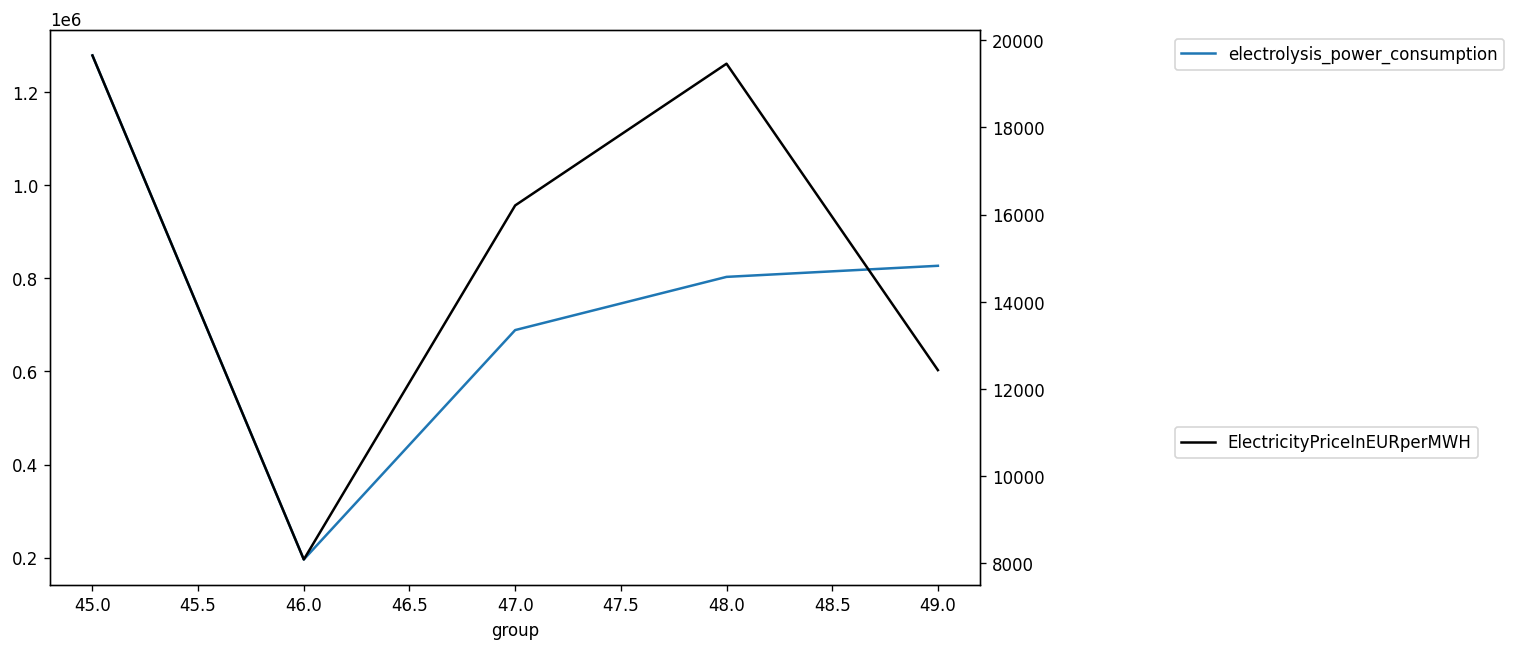

In [124]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
grouped_filtered['electrolysis_power_consumption'].plot( ax=ax1)
ax1.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1.2,    1))
ax2.plot(grouped_filtered['ElectricityPriceInEURperMWH'], color = "black")

ax2.legend(['ElectricityPriceInEURperMWH'],fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 0.3))
#fig1 = ax1.get_figure()
#fig1.savefig(path_to_plots + '/' + 'timeseries.png', bbox_inches='tight', dpi=300)

In [125]:
45*7

315

'\nThere are days 3 days when ther are no res produced. \nThe scarcity hours happende at the day that industrial load was not completely curtailed\n'

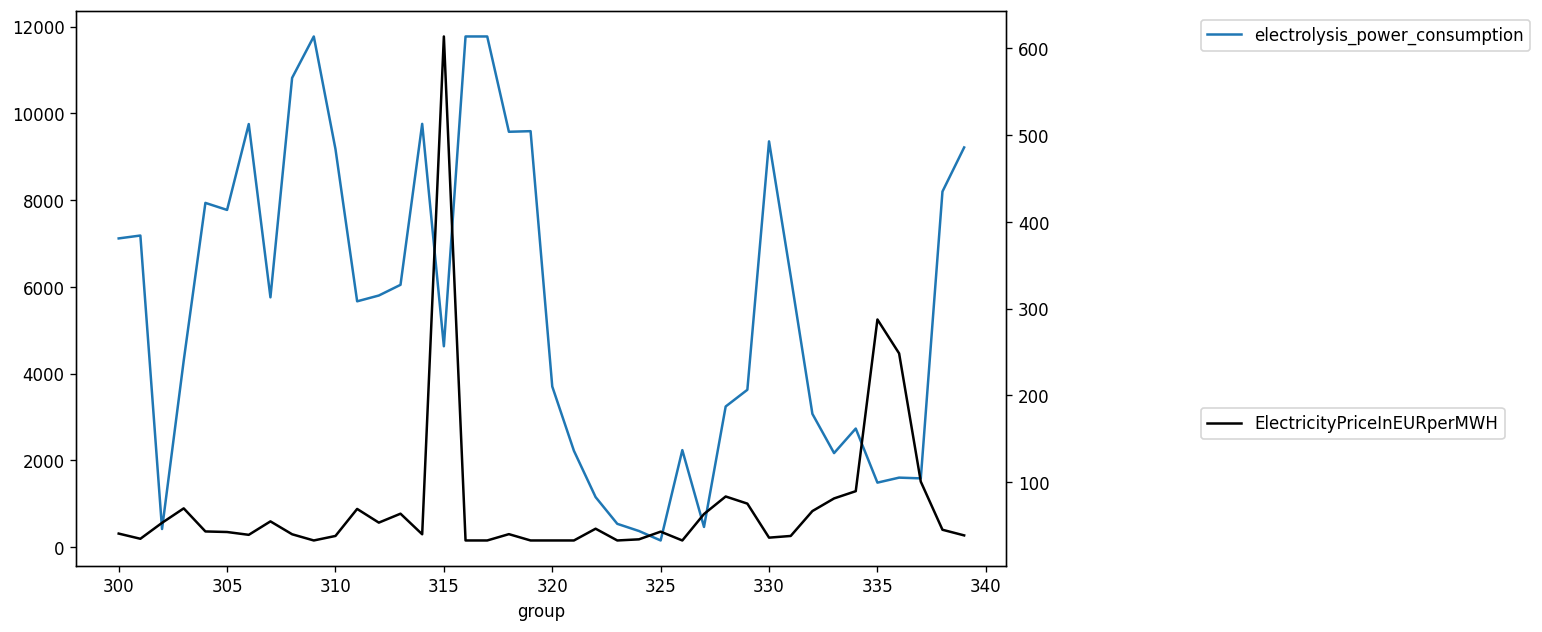

In [136]:
all2 = load_generation
all2['group'] = (load_generation.index // 24)
grouped = all2.groupby(['group']).mean()
grouped_filtered = grouped[300:340]
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
grouped_filtered['electrolysis_power_consumption'].plot( ax=ax1)
ax1.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1.2,    1))
ax2.plot(grouped_filtered['ElectricityPriceInEURperMWH'], color = "black")
#ax2.set_ylim(-1000, 4100)
ax2.legend(['ElectricityPriceInEURperMWH'],fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 0.3))

In [138]:
a=315*24
a

7560

'\nscarcity hour happened even if industry load was curtailed, \n\n'

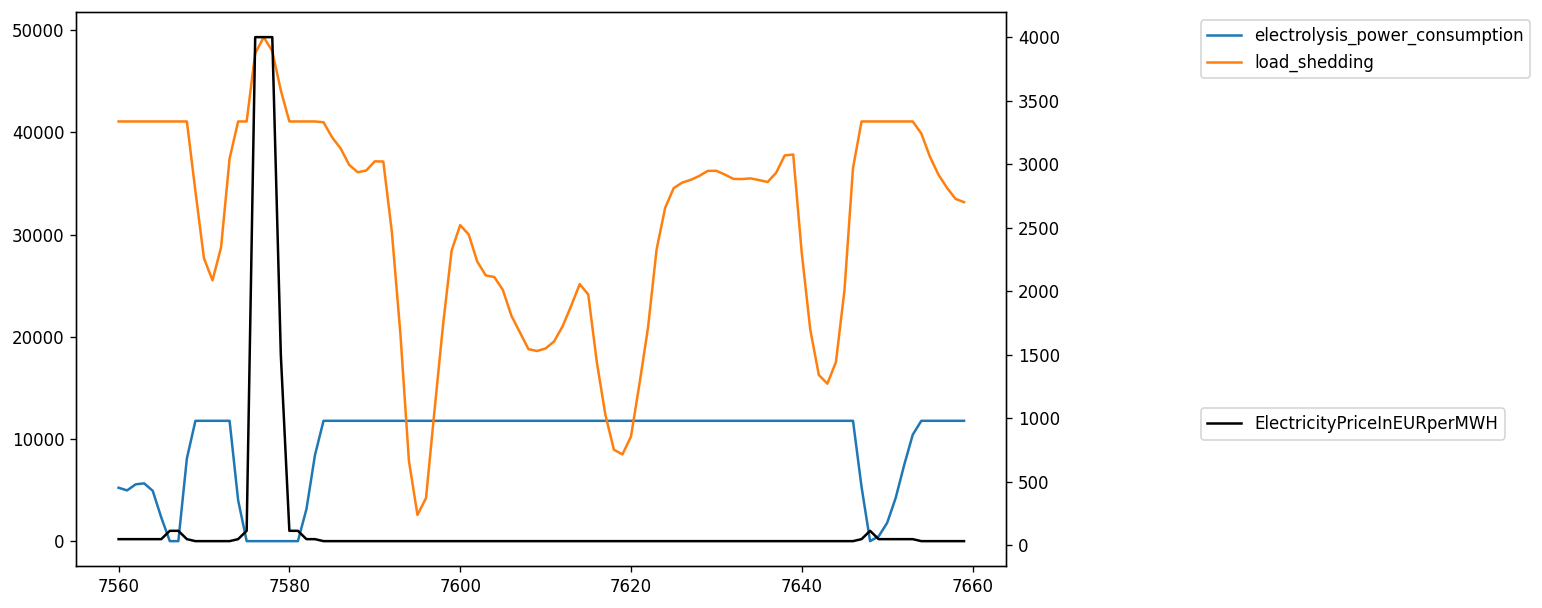

In [144]:
filtered = load_generation[a : a+ 100]
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
filtered['electrolysis_power_consumption'].plot( ax=ax1)
filtered['load_shedding'].plot( ax=ax1)
ax1.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1.2,    1))
ax2.plot(filtered['ElectricityPriceInEURperMWH'], color = "black")
#ax2.set_ylim(-1000, 4100)
ax2.legend(['ElectricityPriceInEURperMWH'],fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 0.3))

"""
scarcity hour happened even if industry load was curtailed, amd load was shedded

"""